Data description

c:\Users\gabyf\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


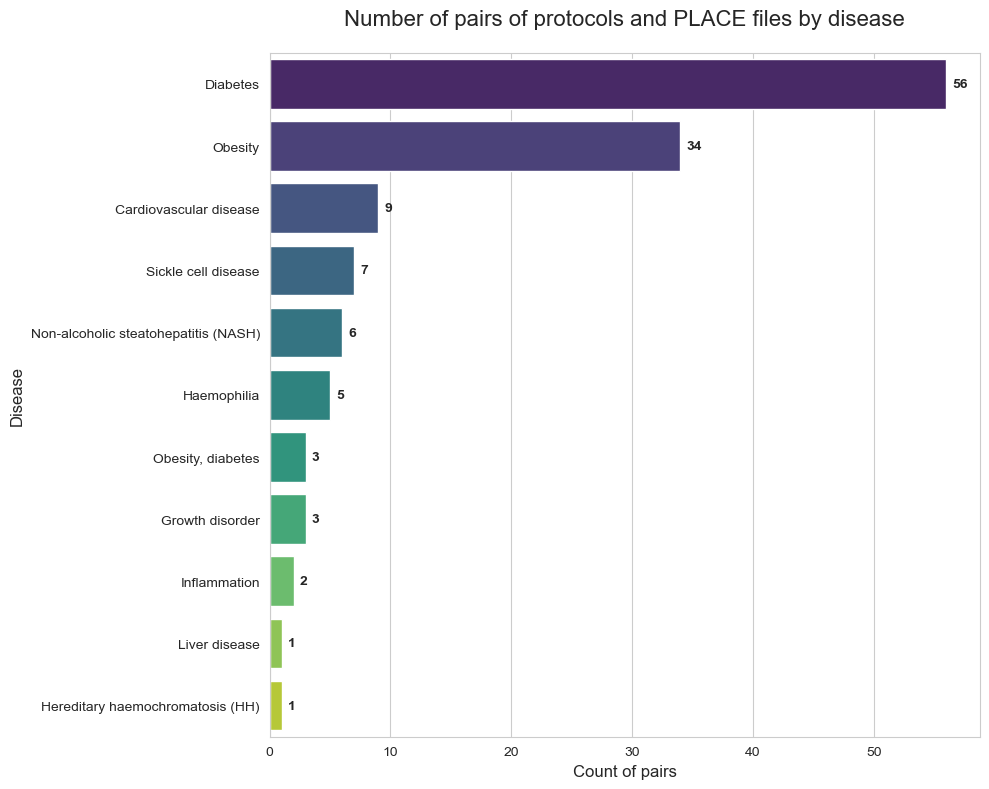

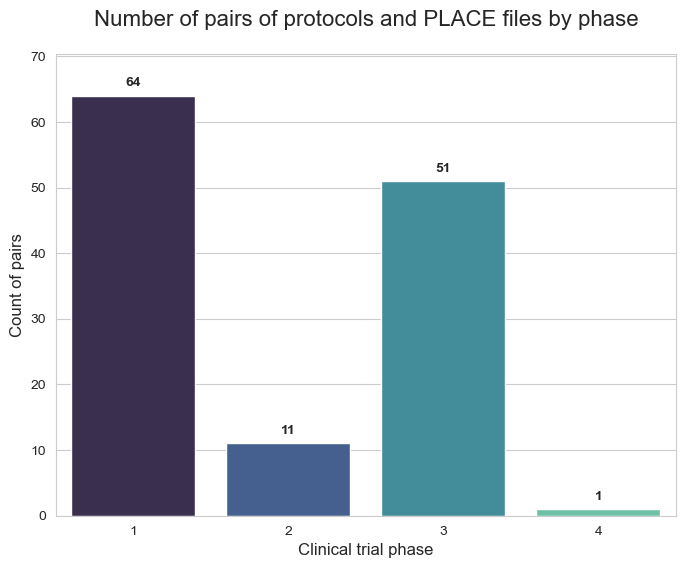

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


disease_data = {
    'Disease': [
        'Diabetes', 'Obesity', 'Cardiovascular disease', 'Sickle cell disease',
        'Non-alcoholic steatohepatitis (NASH)', 'Haemophilia', 'Obesity, diabetes',
        'Growth disorder', 'Inflammation', 'Liver disease', 'Hereditary haemochromatosis (HH)'
    ],
    'Count': [56, 34, 9, 7, 6, 5, 3, 3, 2, 1, 1]
}
df_disease = pd.DataFrame(disease_data)


phase_data = {
    'Phase': [1, 3, 2, 4],
    'Count': [64, 51, 11, 1]
}
df_phase = pd.DataFrame(phase_data)


# Sort diseases by count (descending) 
df_disease = df_disease.sort_values(by='Count', ascending=False)

# Sort phases by phase number (ascending) for logical order
df_phase = df_phase.sort_values(by='Phase', ascending=True)


sns.set_style("whitegrid")

# Plot 1: Number of Protocols by Disease
plt.figure(figsize=(10, 8))
ax_disease = sns.barplot(
    x='Count',
    y='Disease',
    data=df_disease,
    palette='viridis' 
)

# Add titles and labels
ax_disease.set_title('Number of pairs of protocols and PLACE files by disease', fontsize=16, pad=20)
ax_disease.set_xlabel('Count of pairs', fontsize=12)
ax_disease.set_ylabel('Disease', fontsize=12)

# Add the exact count on each bar for clarity
for index, value in enumerate(df_disease['Count']):
    ax_disease.text(value + 0.5, index, str(value), va='center', fontweight='bold')

plt.tight_layout() # Adjust plot to prevent labels from being cut off
plt.show()


# Plot 2: Number of Protocols by Phase
plt.figure(figsize=(8, 6))
ax_phase = sns.barplot(
    x='Phase',
    y='Count',
    data=df_phase,
    palette='mako' 
)

ax_phase.set_title('Number of pairs of protocols and PLACE files by phase', fontsize=16, pad=20)
ax_phase.set_xlabel('Clinical trial phase', fontsize=12)
ax_phase.set_ylabel('Count of pairs', fontsize=12)

for p in ax_phase.patches:
    ax_phase.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 9),
        textcoords='offset points',
        fontweight='bold'
    )

plt.ylim(0, df_phase['Count'].max() * 1.1) # Add a little space at the top
plt.show()

Plot for data retrieval and filtering


In [ ]:
import plotly.graph_objects as go


# 1. sources and the sequential funnel stages.
automated_retrieval = 119
manual_retrieval = 165
total_protocol_pool = 284
staging_post_value = total_protocol_pool
candidate_paired_protocols = 167
protocols_with_tfl_sheet = 147
final_dataset_protocols = 127

nodes = {
    "Automated retrieval": automated_retrieval,
    "Manual retrieval": manual_retrieval,
    "Total protocol pool": total_protocol_pool,
    "__STAGING_POST__": staging_post_value,
    "Uniquely paired protocols": candidate_paired_protocols,
    "Protocols with TFL sheet in PLACE": protocols_with_tfl_sheet,
    "Final protocol dataset": final_dataset_protocols,
    "Filtered: Unpaired, non-interventional, non-NN, duplicated": total_protocol_pool - candidate_paired_protocols,
    "Filtered: No TFL sheet": candidate_paired_protocols - protocols_with_tfl_sheet,
    "Filtered: Empty TFL sheet": protocols_with_tfl_sheet - final_dataset_protocols
}

labels = []
for k, v in nodes.items():
    if k == "__STAGING_POST__":
        labels.append("")
    elif "Filtered" in k:
        reason, count = k.split(":")
        labels.append(f"<b>{reason}:</b><br>{count.strip()}")
    elif k == "Final protocol dataset":
        labels.append(f"<b>{k}</b><br>(with non-empty TFL sheet)<br>N = {v}")
    else:
        labels.append(f"<b>{k}</b><br>N = {v}")


node_x = [
    # Source Nodes
    0.01, 0.01,
    # Funnel Nodes - Shifted to provide space for labels
    0.2,   # Total Protocol Pool
    0.35,  # Staging Post
    0.55,   # Candidate Paired Protocols (was 0.55)
    0.75,   # Protocols with Existing TFL Sheet (was 0.75)
    0.9,   # Final Dataset (was 0.99)
    # Exit Nodes - Aligned under the node they exit from
    0.35,  # Filtered Unpaired (exits from Staging Post at 0.35)
    0.5,   # Filtered No TFL Sheet (exits from Candidate at 0.5)
    0.7,   # Filtered Empty TFL Sheet (exits from WithSheet at 0.7)
]

node_y = [
    # Source Nodes
    0.7, 0.1,
    # Funnel Nodes (aligned at the top)
    0.3, 0.3, 0.3, 0.3, 0.3,
    # Exit Nodes (aligned at the bottom)
    0.85, 0.85, 0.85
]


sources = [0, 1, 2, 3, 3, 4, 4, 5, 5]
targets = [2, 2, 3, 4, 7, 5, 8, 6, 9]
link_values = [
    automated_retrieval,
    manual_retrieval,
    total_protocol_pool,
    candidate_paired_protocols,
    nodes["Filtered: Unpaired, non-interventional, non-NN, duplicated"],
    protocols_with_tfl_sheet,
    nodes["Filtered: No TFL sheet"],
    final_dataset_protocols,
    nodes["Filtered: Empty TFL sheet"]
]

node_colors = [
    "#fca17d", "#66c2a5", # Sources
    "#3d405b", "rgba(0,0,0,0)", "#3d405b", "#3d405b", "#55a868", # Funnel (staging is invisible)
    "#e07a5f", "#e07a5f", "#e07a5f" # Exits
]
link_colors_rgba = [
    "rgba(252, 161, 125, 0.7)", "rgba(102, 194, 165, 0.7)", # Source links
    "rgba(61, 64, 91, 0.7)", # total -> staging
    "rgba(61, 64, 91, 0.7)", "rgba(224, 122, 95, 0.7)", # staging -> candidate, staging -> filter1
    "rgba(61, 64, 91, 0.7)", "rgba(224, 122, 95, 0.7)", # candidate -> with_sheet, candidate -> filter2
    "rgba(61, 64, 91, 0.7)", "rgba(224, 122, 95, 0.7)", # with_sheet -> final, with_sheet -> filter3
]

fig = go.Figure(go.Sankey(
    arrangement="freeform",
    node=dict(
        pad=25,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        x=node_x,
        y=node_y,
        color=node_colors,
        hovertemplate='%{label}<extra></extra>'
    ),
    link=dict(
        source=sources,
        target=targets,
        value=link_values,
        color=link_colors_rgba,
        hovertemplate='Number of protocols: %{value}<extra></extra>'
    )
))

fig.update_layout(
    title_text="<b>Protocol curation process </b>",
    font=dict(size=16, family="Arial, sans-serif"),
    width=1400,
    height=700,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

Gold standard distribution

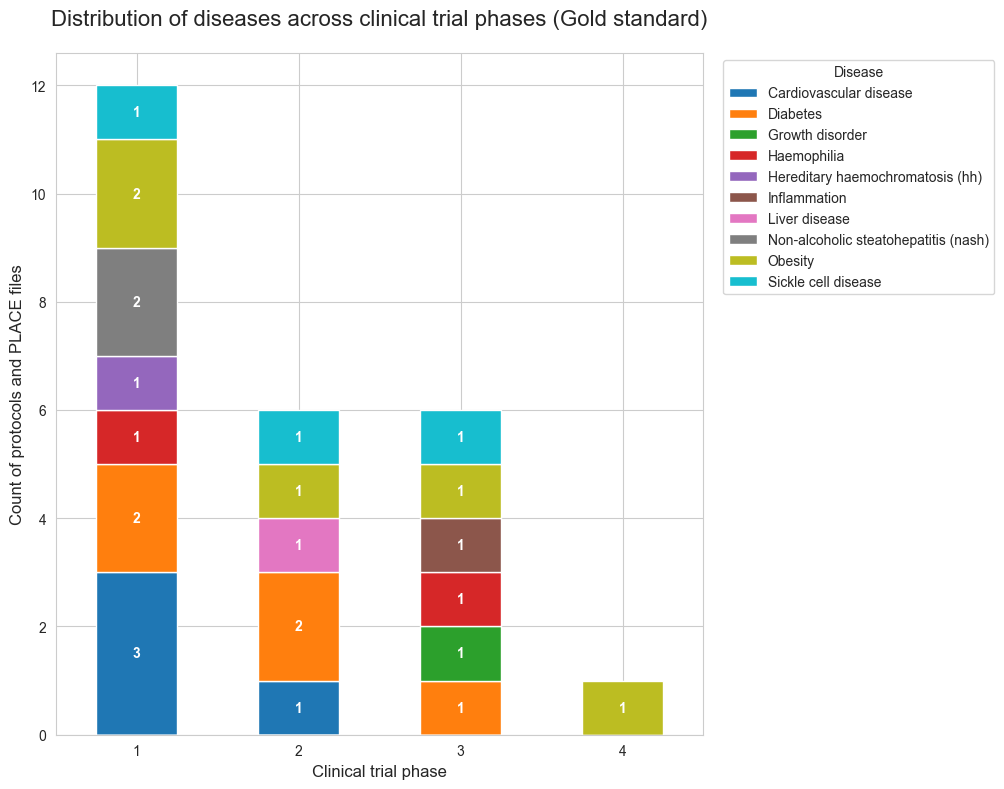

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'Phase': [
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3,
        4
    ],
    'Disease': [
        'cardiovascular disease', 'cardiovascular disease', 'cardiovascular disease',
        'diabetes', 'diabetes', 'haemophilia', 'hereditary haemochromatosis (HH)',
        'non-alcoholic steatohepatitis (NASH)', 'non-alcoholic steatohepatitis (NASH)',
        'obesity', 'obesity', 'sickle cell disease',
        'sickle cell disease', 'liver disease', 'diabetes', 'obesity',
        'cardiovascular disease', 'diabetes',
        'diabetes', 'growth disorder', 'haemophilia', 'inflammation', 'obesity',
        'sickle cell disease',
        'obesity'
    ]
}

df_gold = pd.DataFrame(data)

df_gold['Disease'] = df_gold['Disease'].str.capitalize()

crosstab_df = pd.crosstab(index=df_gold['Phase'], columns=df_gold['Disease'])

sns.set_style("whitegrid")


ax = crosstab_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10'
)


ax.set_title('Distribution of diseases across clinical trial phases (Gold standard)', fontsize=16, pad=20)
ax.set_xlabel('Clinical trial phase', fontsize=12)
ax.set_ylabel('Count of protocols and PLACE files', fontsize=12)
plt.xticks(rotation=0) 

ax.legend(title='Disease', bbox_to_anchor=(1.02, 1), loc='upper left')

for container in ax.containers:
    labels = [f'{int(v)}' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(
        container,
        labels=labels,
        label_type='center',
        color='white',
        fontweight='bold'
    )

plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

c:\Users\gabyf\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


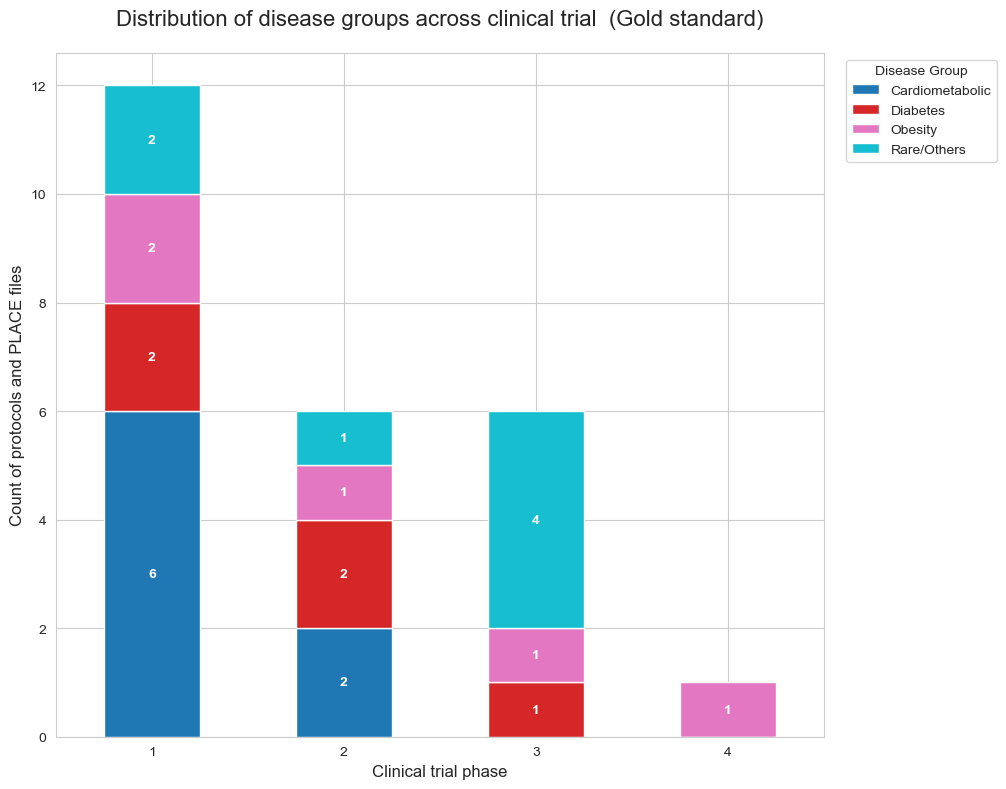

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Phase': [
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3,
        4
    ],
    'Disease': [
        'cardiovascular disease', 'cardiovascular disease', 'cardiovascular disease',
        'diabetes', 'diabetes', 'haemophilia', 'hereditary haemochromatosis (HH)',
        'non-alcoholic steatohepatitis (NASH)', 'non-alcoholic steatohepatitis (NASH)',
        'obesity', 'obesity', 'sickle cell disease',
        'sickle cell disease', 'liver disease', 'diabetes', 'obesity',
        'cardiovascular disease', 'diabetes',
        'diabetes', 'growth disorder', 'haemophilia', 'inflammation', 'obesity',
        'sickle cell disease',
        'obesity'
    ]
}
df_gold = pd.DataFrame(data)

df_gold['Disease'] = df_gold['Disease'].str.capitalize()

def disease_group(disease):
    d = disease.lower()
    if d in ["diabetes", "obesity, diabetes"]:
        return "Diabetes"
    elif d == "obesity":
        return "Obesity"
    elif d in [
        "cardiovascular disease", "non-alcoholic steatohepatitis (nash)",
        "liver disease", "hereditary haemochromatosis (hh)"
    ]:
        return "Cardiometabolic"
    else:
        # covers 'sickle cell disease', 'haemophilia', 'growth disorder', 'inflammation', etc.
        return "Rare/Others"

df_gold['Group'] = df_gold['Disease'].apply(disease_group).astype('category')

grouped = pd.crosstab(
    index=df_gold['Phase'],
    columns=df_gold['Group']
)

sns.set_style("whitegrid")
ax = grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10'
)

ax.set_title('Distribution of disease groups across clinical trial  (Gold standard)', fontsize=16, pad=20)
ax.set_xlabel('Clinical trial phase', fontsize=12)
ax.set_ylabel('Count of protocols and PLACE files', fontsize=12)
plt.xticks(rotation=0)

ax.legend(title='Disease Group', bbox_to_anchor=(1.02, 1), loc='upper left')

for container in ax.containers:
    labels = [f"{int(v)}" if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


Data splitting (for CV)

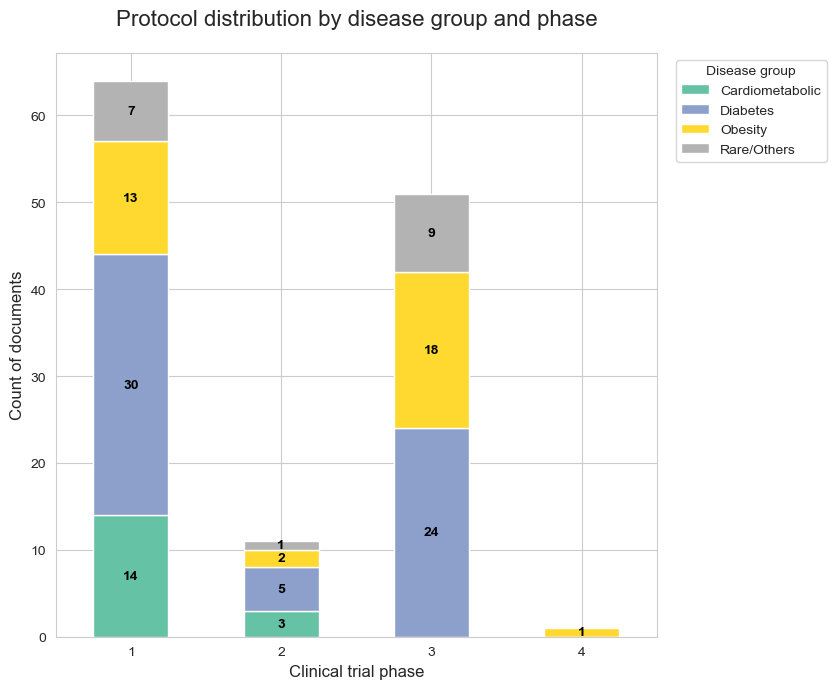

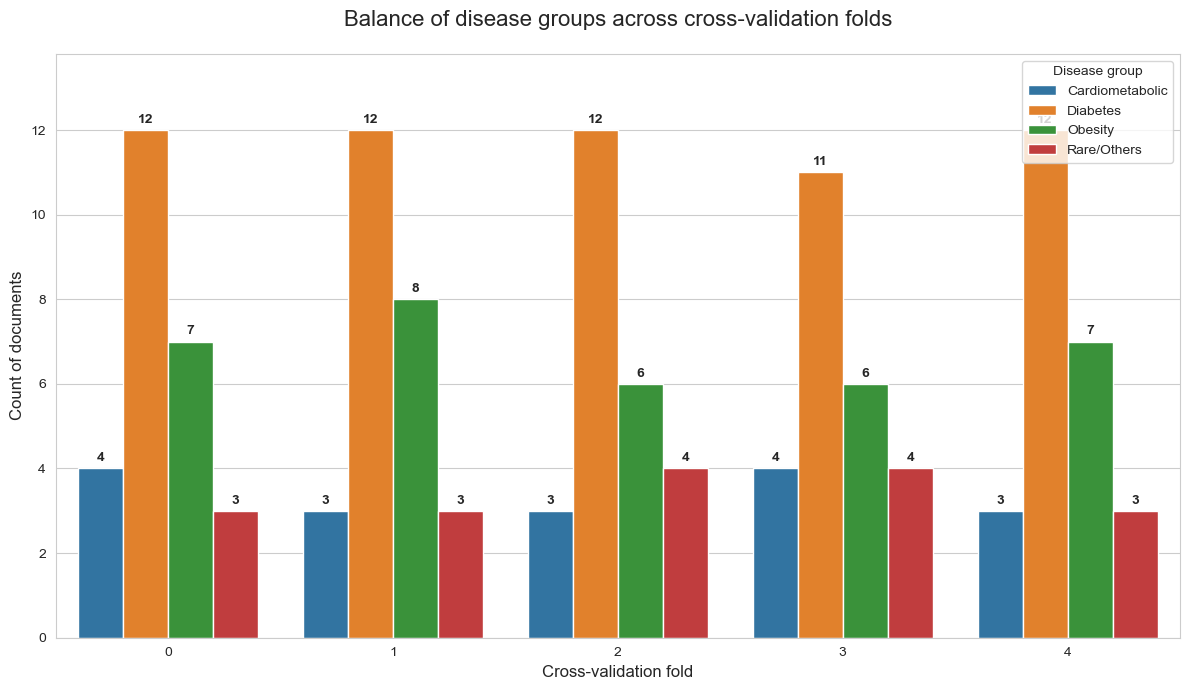

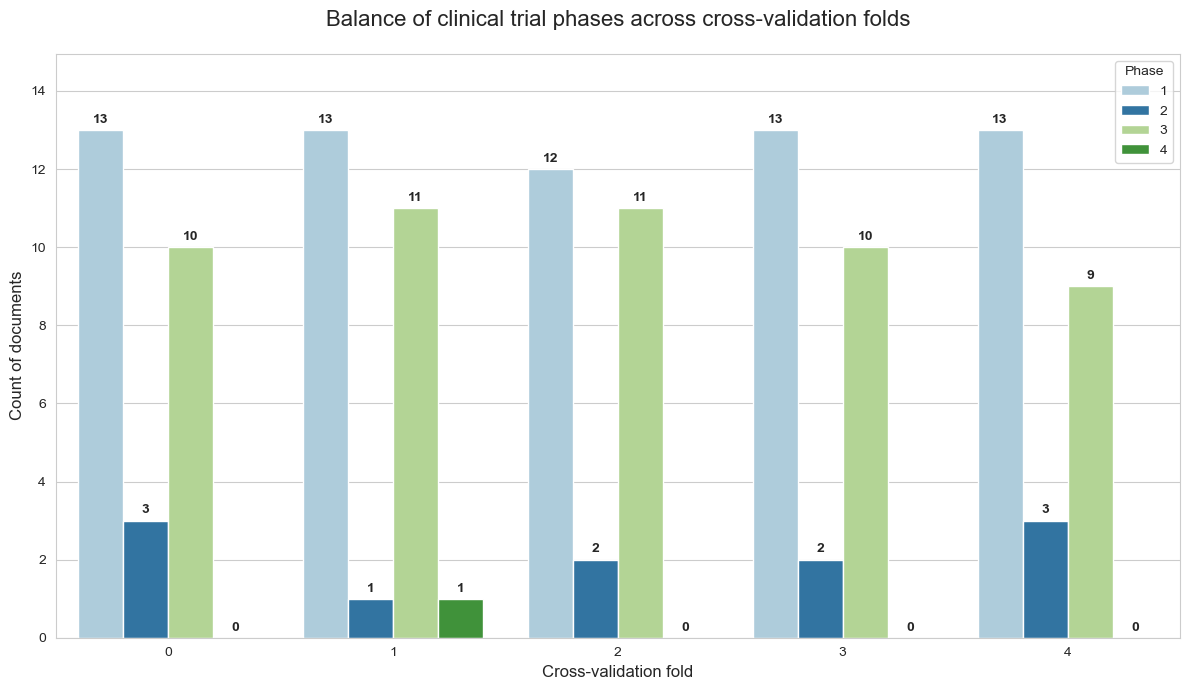

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


disease_phase_data = {
    'Disease_group': ['Cardiometabolic', 'Diabetes', 'Obesity', 'Rare/Others'],
    '1': [14, 30, 13, 7],
    '2': [3, 5, 2, 1],
    '3': [0, 24, 18, 9],
    '4': [0, 0, 1, 0]
}
df_disease_phase = pd.DataFrame(disease_phase_data).set_index('Disease_group')

ax1 = df_disease_phase.T.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7),
    colormap='Set2' 
)

ax1.set_title('Protocol distribution by disease group and phase', fontsize=16, pad=20)
ax1.set_xlabel('Clinical trial phase', fontsize=12)
ax1.set_ylabel('Count of documents', fontsize=12)
plt.xticks(rotation=0)
ax1.legend(title='Disease group', bbox_to_anchor=(1.02, 1), loc='upper left')

for container in ax1.containers:
    labels = [f'{int(v)}' if v > 0 else '' for v in container.datavalues]
    ax1.bar_label(container, labels=labels, label_type='center', color='black', fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# Plot 2: Balance of Disease Groups Across CV Folds

fold_disease_data = {
    'fold': [0, 1, 2, 3, 4],
    'Cardiometabolic': [4, 3, 3, 4, 3],
    'Diabetes': [12, 12, 12, 11, 12],
    'Obesity': [7, 8, 6, 6, 7],
    'Rare/Others': [3, 3, 4, 4, 3]
}
df_fold_disease = pd.DataFrame(fold_disease_data)

df_fold_disease_melted = df_fold_disease.melt(
    id_vars='fold',
    var_name='Disease_group',
    value_name='Count'
)

plt.figure(figsize=(12, 7))
ax2 = sns.barplot(
    data=df_fold_disease_melted,
    x='fold',
    y='Count',
    hue='Disease_group',
    palette='tab10'
)

ax2.set_title('Balance of disease groups across cross-validation folds', fontsize=16, pad=20)
ax2.set_xlabel('Cross-validation fold', fontsize=12)
ax2.set_ylabel('Count of documents', fontsize=12)
ax2.legend(title='Disease group')

for container in ax2.containers:
    ax2.bar_label(container, padding=3, fontweight='bold')

plt.ylim(0, df_fold_disease_melted['Count'].max() * 1.15) 
plt.tight_layout()
plt.show()


# Plot 3: Balance of Phases Across CV Folds


fold_phase_data = {
    'fold': [0, 1, 2, 3, 4],
    '1': [13, 13, 12, 13, 13],
    '2': [3, 1, 2, 2, 3],
    '3': [10, 11, 11, 10, 9],
    '4': [0, 1, 0, 0, 0]
}
df_fold_phase = pd.DataFrame(fold_phase_data)

df_fold_phase_melted = df_fold_phase.melt(
    id_vars='fold',
    var_name='Phase',
    value_name='Count'
)

plt.figure(figsize=(12, 7))
ax3 = sns.barplot(
    data=df_fold_phase_melted,
    x='fold',
    y='Count',
    hue='Phase',
    palette='Paired'
)

ax3.set_title('Balance of clinical trial phases across cross-validation folds', fontsize=16, pad=20)
ax3.set_xlabel('Cross-validation fold', fontsize=12)
ax3.set_ylabel('Count of documents', fontsize=12)
ax3.legend(title='Phase')

for container in ax3.containers:
    ax3.bar_label(container, padding=3, fontweight='bold')

plt.ylim(0, df_fold_phase_melted['Count'].max() * 1.15)
plt.tight_layout()
plt.show()

Embeddings plots:

Step 1: Loading and preparing data...
Loaded 127 records from combined_data.jsonl
Merged metadata for Phase and Disease Group.
Merged CV fold assignments.

Step 2: Generating protocol embeddings...

Step 3: Reducing dimensions with PCA, t-SNE, and UMAP...
  - Running UMAP...


C:\Users\gabyf\AppData\Local\Temp\ipykernel_14620\2442900993.py:262: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Phase'] = df['Phase'].fillna('Unknown').astype(str)
c:\Users\gabyf\OneDrive\Documentos\DTU\Thesis\Code\thesis\tfm-env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Step 4: Generating and saving all plots...
Plot saved to: embedding_plots_umap\plot_by_Disease_group_umap.png


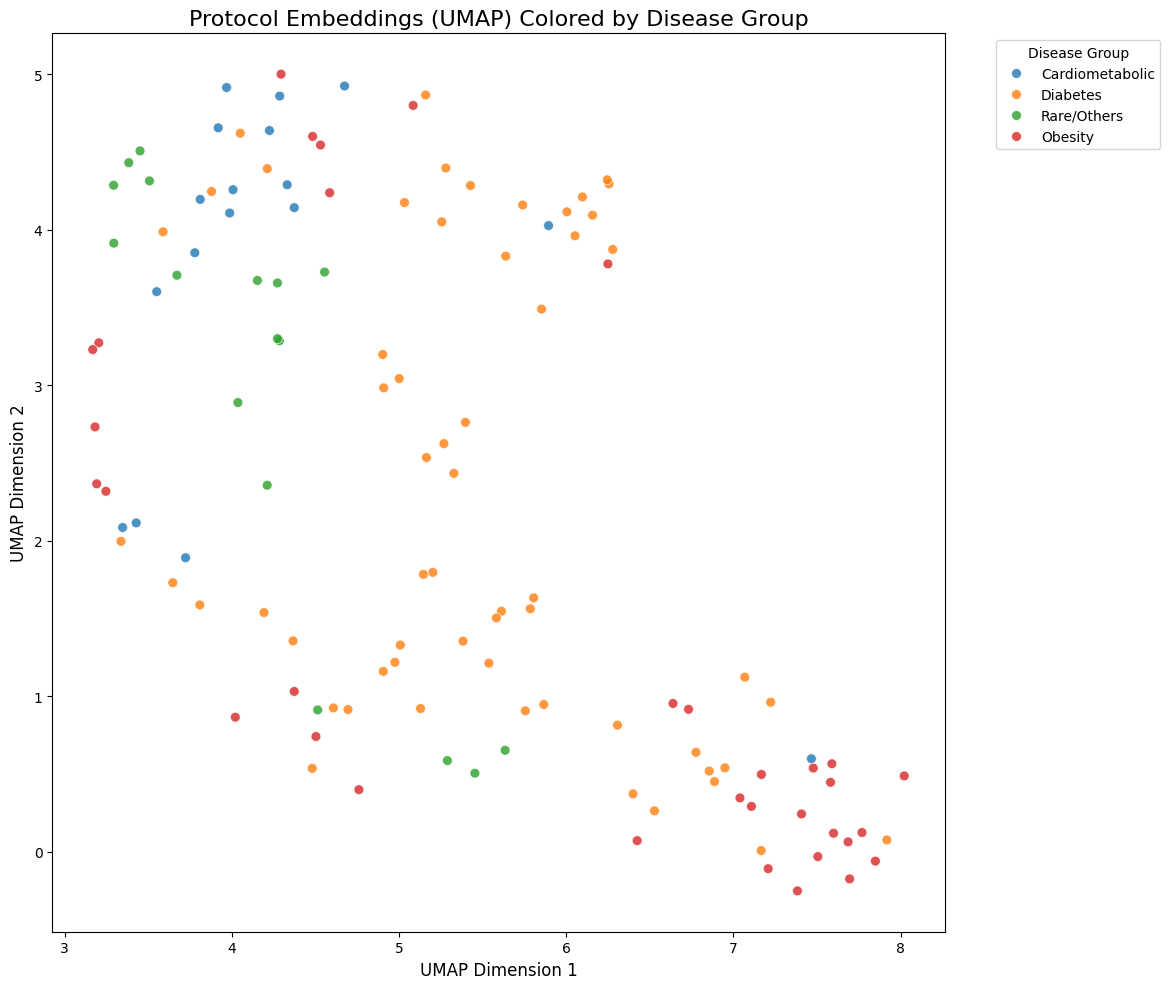

Plot saved to: embedding_plots_umap\plot_by_Phase_umap.png


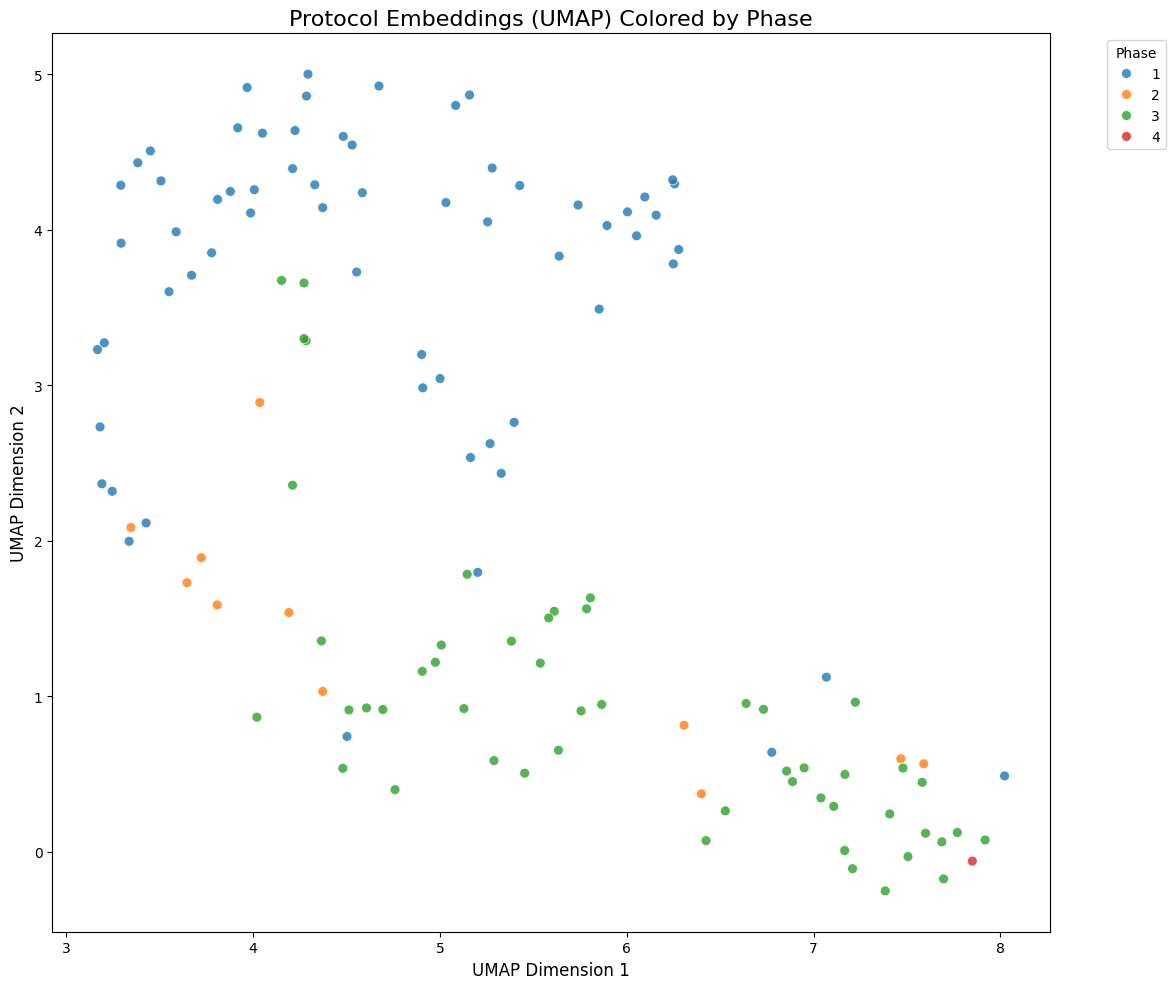

Plot saved to: embedding_plots_umap\plot_by_cv_fold_umap.png


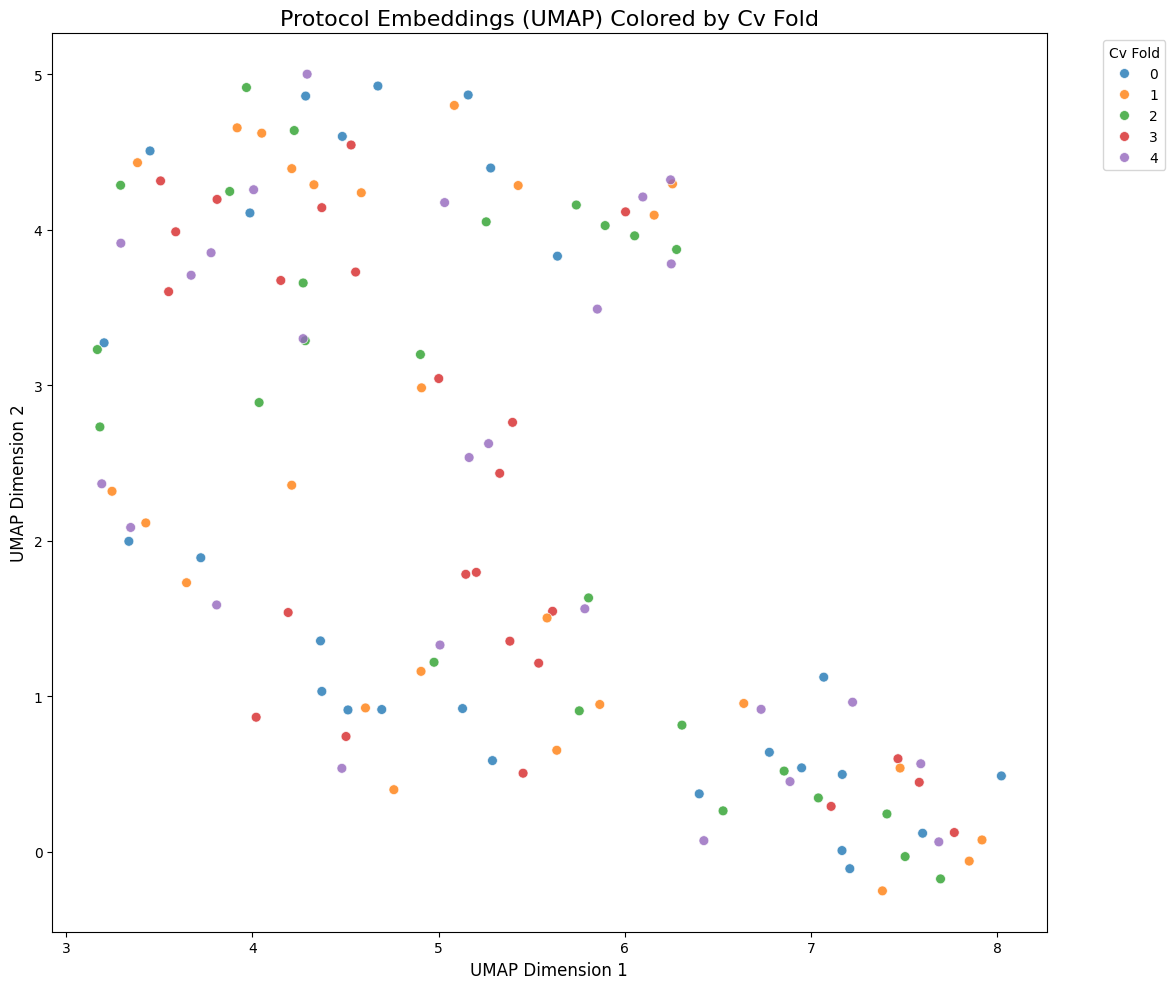


Step 5: Generating combined plot for UMAP...
Combined plot saved to: embedding_plots_umap\umap_plots\plot_combined_Disease_group_and_Phase_umap.png


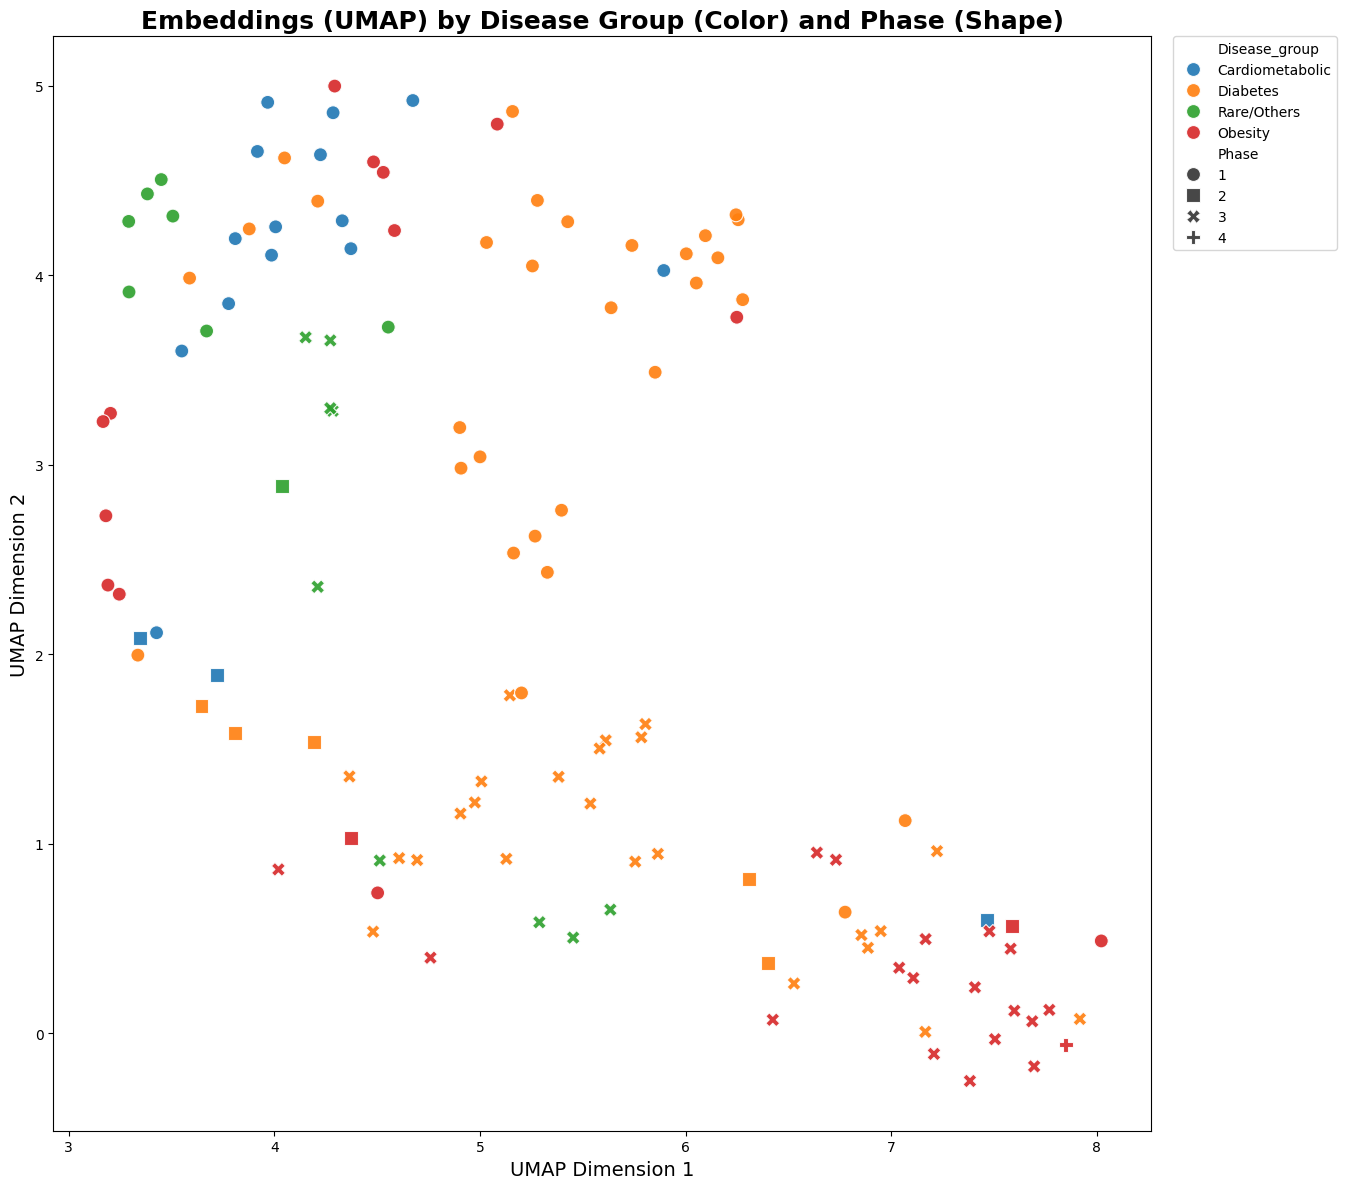


Exploratory data analysis complete.

Exploratory data analysis complete. All plots saved in the 'all_embedding_plots' directory.


In [ ]:

import json
import pathlib
import os
import time
import warnings
import sys
import numpy as np
import openai
import pandas as pd
import tiktoken
from tqdm import tqdm
import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

##############################################################################
DATA_FILE = pathlib.Path("combined_data.jsonl")
META_FILE = pathlib.Path("protocols_place.xlsx")
FOLD_FILE = pathlib.Path("fold_assignments.json")
OUTPUT_DIR = pathlib.Path("embedding_plots_umap") 
OUTPUT_DIR.mkdir(exist_ok=True)

# --- OpenAI Config ---
OPENAI_KEY = os.getenv("API_KEY")
EMBED_MODEL = "openai_text_embedding_3_small"
BASE_URL = "https://api.marketplace.novo-genai.com/v1" 

#  Embedding & Plotting Config 
CHUNK_SIZE = 800
OVERLAP = 200
BATCH_SIZE = 96
RANDOM_STATE = 42 

# Initialize OpenAI client and tokenizer
openai_client = openai.OpenAI(
    api_key=OPENAI_KEY,
    base_url=BASE_URL 
)
tok_embed = tiktoken.encoding_for_model("text-embedding-3-small")
EMBEDDING_DIM = 1536


def split_chunks(text: str, size: int = CHUNK_SIZE, overlap: int = OVERLAP) -> list[str]:
    """Splits a text into chunks of tokens with a specified overlap."""
    if not isinstance(text, str) or not text.strip():
        return []
    toks = tok_embed.encode(text)
    step = size - overlap
    return [tok_embed.decode(toks[s : s + size]) for s in range(0, len(toks), step)]

def _embed_batch(batch: list[str]) -> list[list[float]]:
    """Embeds a single batch of texts with retry logic."""
    for attempt in range(5):
        try:
            res = openai_client.embeddings.create(model=EMBED_MODEL, input=batch)
            return [d.embedding for d in res.data]
        except openai.RateLimitError:
            wait_time = 2**attempt
            print(f"Rate limit hit. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
        except Exception as e:
            print(f"An error occurred during embedding: {e}")
            time.sleep(5)
    raise RuntimeError("Embedding failed after multiple retries.")

def embed_texts(texts: list[str]) -> np.ndarray:
    """Embeds a list of texts in batches."""
    vecs, buf = [], []
    filtered_texts = [t.strip() for t in texts if isinstance(t, str) and t.strip()]
    if not filtered_texts:
        return np.empty((0, EMBEDDING_DIM), dtype="float32")

    for t in tqdm(filtered_texts, desc="Embedding chunks", leave=False):
        buf.append(t)
        if len(buf) == BATCH_SIZE:
            vecs.extend(_embed_batch(buf))
            buf.clear()
    if buf:
        vecs.extend(_embed_batch(buf))

    return np.asarray(vecs, dtype="float32")

def disease_group(disease: str) -> str:
    """Categorizes a disease string into a broader group."""
    disease = str(disease).lower()
    if disease in ["diabetes", "obesity, diabetes"]:
        return "Diabetes"
    elif disease == "obesity":
        return "Obesity"
    elif disease in [
        "cardiovascular disease",
        "non-alcoholic steatohepatitis (nash)",
        "liver disease",
        "hereditary haemochromatosis (hh)",
    ]:
        return "Cardiometabolic"
    else:
        return "Rare/Others"

def generate_protocol_embeddings(df: pd.DataFrame) -> np.ndarray:
    """
    Generates a single mean-pooled embedding for each protocol in the DataFrame.
    """
    all_protocol_embeddings = []
    print("Generating embeddings for all protocols...")
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing protocols"):
        chunks = split_chunks(row["text"])
        
        if not chunks:
            protocol_vec = np.zeros(EMBEDDING_DIM, dtype="float32")
        else:
            chunk_vecs = embed_texts(chunks)
            if chunk_vecs.shape[0] > 0:
                protocol_vec = np.mean(chunk_vecs, axis=0)
            else:
                protocol_vec = np.zeros(EMBEDDING_DIM, dtype="float32")
        
        all_protocol_embeddings.append(protocol_vec)

    return np.asarray(all_protocol_embeddings)

def plot_embeddings(df: pd.DataFrame, method: str, hue_column: str):
    """
    Generates and saves a scatter plot for a given dimensionality reduction method.
    """
    method_upper = method.upper()
    x_col, y_col = f"{method}_1", f"{method}_2"
    
    title = f'Protocol Embeddings ({method_upper}) Colored by {hue_column.replace("_", " ").title()}'
    
    # Create a specific directory for the method if it doesn't exist
    output_dir = OUTPUT_DIR / f"{method}_plots"
    output_dir.mkdir(exist_ok=True)
    
    filename = f'plot_by_{hue_column}_{method}.png'
    output_path = output_dir / filename

    plt.figure(figsize=(14, 10))
    palette = "viridis" if pd.api.types.is_numeric_dtype(df[hue_column]) else "tab10"

    plot = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        hue=hue_column,
        palette=palette,
        s=50,
        alpha=0.8,
    )
    plt.title(title, fontsize=16)
    plt.xlabel(f"{method_upper} Dimension 1", fontsize=12)
    plt.ylabel(f"{method_upper} Dimension 2", fontsize=12)
    plt.legend(title=hue_column.replace('_', ' ').title(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    output_path = OUTPUT_DIR / filename
    plt.savefig(output_path, dpi=300)
    print(f"Plot saved to: {output_path}")
    plt.show()
    plt.close() # Close the figure to free up memory
    
def plot_combined_embeddings(df: pd.DataFrame, method: str, hue_column: str, style_column: str):
    """
    Generates, saves, and displays a UMAP plot with both color (hue) and shape (style).
    """
    method_upper = method.upper()
    x_col, y_col = f"{method}_1", f"{method}_2"
    
    title = f'Embeddings ({method_upper}) by {hue_column.replace("_", " ").title()} (Color) and {style_column.title()} (Shape)'
    
    output_dir = OUTPUT_DIR / f"{method}_plots"
    output_dir.mkdir(exist_ok=True)
    
    filename = f'plot_combined_{hue_column}_and_{style_column}_{method}.png'
    output_path = output_dir / filename

    plt.figure(figsize=(16, 12))

    df[style_column] = df[style_column].astype('category')
    
    num_styles = len(df[style_column].cat.categories)
    markers = ['o', 's', 'X', 'P', 'D', '^'][:num_styles] 

    plot = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        hue=hue_column,      
        style=style_column,  
        palette="tab10",     
        markers=markers,    
        s=100,              
        alpha=0.9,
    )
    plt.title(title, fontsize=18, weight='bold')
    plt.xlabel(f"{method_upper} Dimension 1", fontsize=14)
    plt.ylabel(f"{method_upper} Dimension 2", fontsize=14)
    
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    plt.savefig(output_path, dpi=300)
    print(f"Combined plot saved to: {output_path}")
    plt.show()
    plt.close()


if __name__ == "__main__":
    print("Step 1: Loading and preparing data...")
    try:
        all_records = [json.loads(l) for l in DATA_FILE.read_text(encoding="utf-8").splitlines() if l.strip()]

        df = pd.DataFrame(all_records)
        print(f"Loaded {len(df)} records from {DATA_FILE}")
    except FileNotFoundError:
        raise SystemExit(f"ERROR: Data file not found at {DATA_FILE}")

    if META_FILE.exists():
        meta_df = pd.read_excel(META_FILE, sheet_name="new_data", dtype={"ID": str})
        meta_df.rename(columns={"ID": "id"}, inplace=True)
        meta_df["Disease_group"] = meta_df["Disease"].apply(disease_group)
        df = df.merge(meta_df[["id", "Phase", "Disease_group"]], on="id", how="left")
        print("Merged metadata for Phase and Disease Group.")
    else:
        warnings.warn(f"Metadata file {META_FILE} not found. Skipping Phase/Disease info.")
        df["Phase"] = "Unknown"
        df["Disease_group"] = "Unknown"

    if FOLD_FILE.exists():
        fold_map = json.load(open(FOLD_FILE))
        df["cv_fold"] = df["id"].map(fold_map).fillna(-1).astype(int)
        print("Merged CV fold assignments.")
    else:
        warnings.warn(f"Fold file {FOLD_FILE} not found. Skipping CV fold info.")
        df["cv_fold"] = -1

    df['Phase'] = df['Phase'].fillna('Unknown').astype(str)
    df['Disease_group'] = df['Disease_group'].fillna('Unknown')
    
    print("\nStep 2: Generating protocol embeddings...")
    # protocol_embeddings = generate_protocol_embeddings(df)
    # np.save("protocol_embeddings.npy", protocol_embeddings)
    #if already generated, I can load the embeddings from a file
    protocol_embeddings = np.load("protocol_embeddings.npy")

     #Reduce dimensionality with all three methods
    print("\nStep 3: Reducing dimensions with PCA, t-SNE, and UMAP...")

    # PCA
    print("  - Running PCA...")
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    embeddings_pca = pca.fit_transform(protocol_embeddings)
    df['pca_1'] = embeddings_pca[:, 0]
    df['pca_2'] = embeddings_pca[:, 1]
    
    # t-SNE
    print("  - Running t-SNE...")
    tsne = TSNE(n_components=2, perplexity=30, random_state=RANDOM_STATE)
    embeddings_tsne = tsne.fit_transform(protocol_embeddings)
    df['tsne_1'] = embeddings_tsne[:, 0]
    df['tsne_2'] = embeddings_tsne[:, 1]

    # UMAP
    print("  - Running UMAP...")
    reducer_umap = umap.UMAP(n_neighbors=25, min_dist=0.01, n_components=2, metric='cosine', random_state=RANDOM_STATE)
    embeddings_umap = reducer_umap.fit_transform(protocol_embeddings)
    df['umap_1'] = embeddings_umap[:, 0]
    df['umap_2'] = embeddings_umap[:, 1]
    
    print("\nStep 4: Generating and saving all plots...")
    
    hue_columns = ['Disease_group', 'Phase', 'cv_fold']
    methods = ['pca', 'tsne', 'umap']
   
    for method in methods:
        df['Phase'] = df['Phase'].astype('category')
        df['cv_fold'] = df['cv_fold'].astype('category')
        
        for hue_col in hue_columns:
            plot_embeddings(df, method=method, hue_column=hue_col)

    print("\nStep 5: Generating combined plot for UMAP...")
    for method in methods:
        
        plot_combined_embeddings(
            df,
            method= method,
            hue_column='Disease_group', 
            style_column='Phase'       
        )




In [ ]:
# np.save("protocol_embeddings.npy", protocol_embeddings)


In [44]:
# %pip install numpy==1.24.4
# %pip install pandas openai tiktoken tqdm matplotlib seaborn umap-learn
# %pip install openpyxl
%pip install faiss-cpu scipy

  Using cached faiss_cpu-1.11.0-cp311-cp311-win_amd64.whl (15.0 MB)
Note: you may need to restart the kernel to use updated packages.


Results offline retrieval evaluation (RAG)

c:\Users\gabyf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


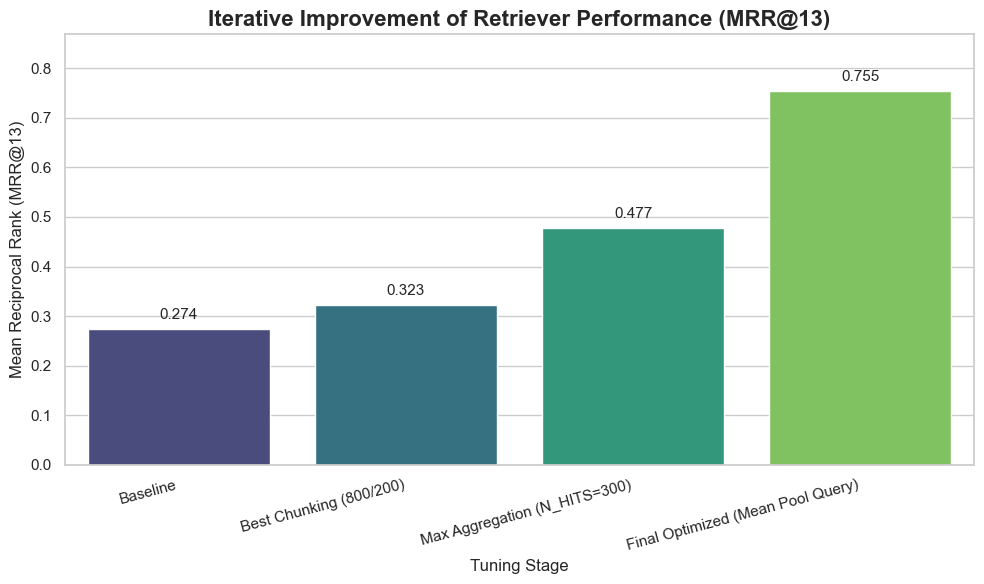

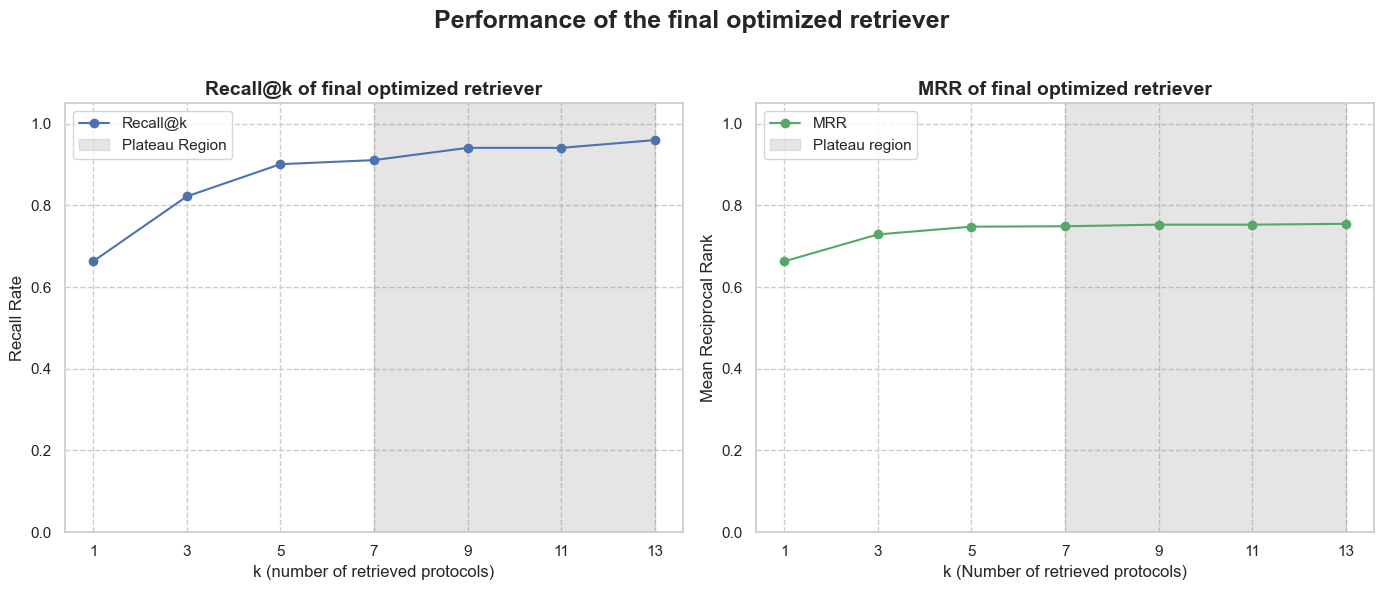

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid")

tuning_results = {
    "Baseline": {
        "k": [1, 3, 5, 7, 9, 11, 13],
        "recall": [0.168, 0.307, 0.376, 0.455, 0.545, 0.564, 0.634],
        "mrr": [0.168, 0.228, 0.244, 0.256, 0.267, 0.269, 0.274]
    },
    "Best Chunking (800/200)": {
        "k": [1, 3, 5, 7, 9, 11, 13],
        "recall": [0.188, 0.396, 0.485, 0.535, 0.634, 0.673, 0.703],
        "mrr": [0.188, 0.279, 0.298, 0.305, 0.317, 0.321, 0.323]
    },
    "Max Aggregation (N_HITS=300)": {
        "k": [1, 3, 5, 7, 9, 11, 13],
        "recall": [0.327, 0.584, 0.673, 0.713, 0.762, 0.762, 0.822],
        "mrr": [0.327, 0.441, 0.460, 0.467, 0.473, 0.473, 0.477]
    },
    "Final Optimized (Mean Pool Query)": {
        "k": [1, 3, 5, 7, 9, 11, 13],
        "recall": [0.663, 0.822, 0.901, 0.911, 0.941, 0.941, 0.960],
        "mrr": [0.663, 0.729, 0.748, 0.749, 0.753, 0.753, 0.755]
    }
}


stages = list(tuning_results.keys())
mrr_scores = [tuning_results[stage]["mrr"][-1] for stage in stages]

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=stages, y=mrr_scores, palette="viridis")

plt.title("Iterative Improvement of Retriever Performance (MRR@13)", fontsize=16, weight='bold')
plt.ylabel("Mean Reciprocal Rank (MRR@13)", fontsize=12)
plt.xlabel("Tuning Stage", fontsize=12)
plt.xticks(rotation=15, ha='right')

for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.3f}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom',
                   size=11, xytext=(0, 5),
                   textcoords='offset points')

plt.ylim(0, max(mrr_scores) * 1.15)
plt.tight_layout()
plt.show()


final_config = tuning_results["Final Optimized (Mean Pool Query)"]
k_values = final_config["k"]
recall_values = final_config["recall"]
mrr_values = final_config["mrr"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(k_values, recall_values, 'o-', color='b', label='Recall@k')
ax1.set_title("Recall@k of final optimized retriever", fontsize=14, weight='bold')
ax1.set_xlabel("k (number of retrieved protocols)", fontsize=12)
ax1.set_ylabel("Recall Rate", fontsize=12)
ax1.set_xticks(k_values)
ax1.set_ylim(0, 1.05)
ax1.grid(True, which='both', linestyle='--')

ax1.axvspan(7, 13, color='gray', alpha=0.2, label='Plateau Region')
ax1.legend()

ax2.plot(k_values, mrr_values, 'o-', color='g', label='MRR')
ax2.set_title("MRR of final optimized retriever", fontsize=14, weight='bold')
ax2.set_xlabel("k (Number of retrieved protocols)", fontsize=12)
ax2.set_ylabel("Mean Reciprocal Rank", fontsize=12)
ax2.set_xticks(k_values)
ax2.set_ylim(0, 1.05)
ax2.grid(True, which='both', linestyle='--')

ax2.axvspan(7, 13, color='gray', alpha=0.2, label='Plateau region')
ax2.legend()

fig.suptitle("Performance of the final optimized retriever", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()